In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.datasets import load_iris
from keras.optimizers import SGD
from sklearn.cluster import KMeans


iris=load_iris()
X=iris.data
y=iris.target
#print(type(iris.data))
target=to_categorical(iris.target)

n_cols=X.shape[1]
print(n_cols)

early_stopping_monitor=EarlyStopping(patience=3)

model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))

myOptimizer=SGD(0.1)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=myOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, target,callbacks=[early_stopping_monitor], verbose=0,  nb_epoch=28)


4


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


In [27]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


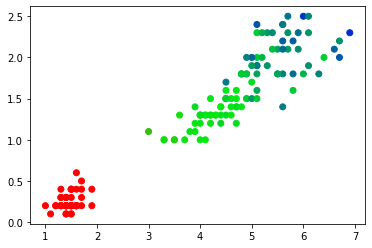

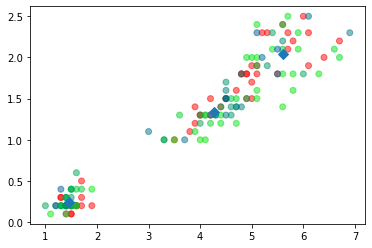

In [29]:
predictions=model.predict(X)
#print(predictions)

df=pd.DataFrame(X,columns=iris.feature_names)

#print(df.head())
xs=df['petal length (cm)']
ys=df['petal width (cm)']

labels=predictions

_=plt.scatter(xs,ys,c=labels)
plt.show()

kmeans_model = KMeans(n_clusters=3)
points=np.column_stack((xs,ys))

# Fit model to points
kmeans_model.fit(points)


new_points=np.random.permutation(points)
xs = new_points[:,0]
ys = new_points[:,1]

plt.clf()
# Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()

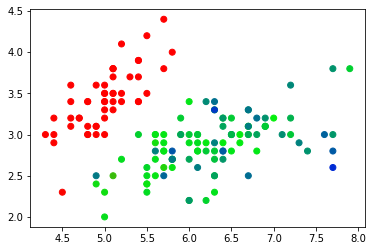

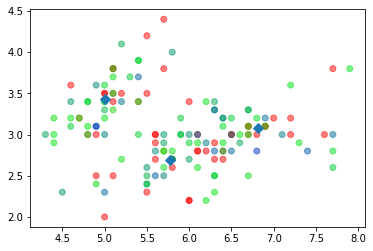

In [30]:
xs=df['sepal length (cm)']
ys=df['sepal width (cm)']

labels=predictions

_=plt.scatter(xs,ys,c=labels)
plt.show()

kmeans_model = KMeans(n_clusters=3)
points=np.column_stack((xs,ys))

# Fit model to points
kmeans_model.fit(points)


new_points=np.random.permutation(points)
xs = new_points[:,0]
ys = new_points[:,1]

plt.clf()
# Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()